In [53]:
import numpy as np
import pandas as pd
import umap ###install with "pip install umap-learn"
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns ### install using pip install seaborn

In [28]:
pd.options.display.max_rows=10

d = pd.read_csv("tidyVRtrackdata_13Apr2020.csv")
direction = pd.read_csv("DirectionData_1Dec20.csv")
rotation = pd.read_csv("RotationData_1Dec20.csv")
print(direction)
print(rotation)

     labvisitid     x_0.5       x_1     x_1.5       x_2     x_2.5       x_3  \
0             1 -0.032859 -0.048084 -0.097676 -0.138635 -0.146665 -0.070245   
1             2  0.106513  0.076684  0.143966  0.249650  0.269067  0.198519   
2             3  0.053312  0.052485  0.055687  0.076028  0.076897  0.064186   
3             4 -0.010841 -0.007432 -0.016471  0.053747  0.145198  0.160172   
4             5  0.104969  0.034937 -0.045508 -0.097222 -0.102852 -0.060920   
..          ...       ...       ...       ...       ...       ...       ...   
227        5006  0.153507  0.160137  0.168591  0.140064  0.086269  0.033719   
228        5007 -0.026387 -0.019489 -0.002590 -0.002269 -0.003772 -0.008429   
229        5008  0.458718  0.455789  0.492861  0.499983  0.520728  0.589518   
230        5009 -0.012972 -0.022789 -0.056890 -0.024279  0.054629  0.023097   
231        5010 -0.118002 -0.159074 -0.178903 -0.177739 -0.140099 -0.145551   

        x_3.5       x_4     x_4.5  ...  z_458  z_45

In [29]:
rotation1 = rotation.iloc[:, 1:2775].copy()
print(rotation1)

       yaw_0.5      yaw_1    yaw_1.5      yaw_2    yaw_2.5       yaw_3  \
0   -12.819052 -21.993694 -36.960159 -36.280998 -36.989056  -40.799503   
1   -14.121522 -22.114445  15.133641  52.189201  61.190361   37.750393   
2     0.382742   0.378596   0.582055   5.480828   5.522862    4.240273   
3     9.441733   7.737449  14.775006  27.758444  26.661465   24.432079   
4    -0.114574 -15.798509 -32.600330 -48.695320 -54.353134  -48.824638   
..         ...        ...        ...        ...        ...         ...   
227 -24.244835 -25.929424 -25.348288 -17.611212 -14.751836  -19.310373   
228   3.237774   4.138927   6.673186   6.806389   6.664309    5.949316   
229  70.750038  72.706879  83.012749  89.776138  94.205040  102.713608   
230   4.389607   3.897130   2.789073   4.830565   4.719046    5.551315   
231 -23.766075 -31.166998 -36.654472 -38.068420 -31.277029  -34.355011   

        yaw_3.5       yaw_4     yaw_4.5       yaw_5  ...  roll_457.5  \
0    -39.966045  -38.430420  -41.280598

In [30]:
rot_scaling = rotation1.values
scaler = MinMaxScaler()
rot_scaled = scaler.fit_transform(rot_scaling)
print(rot_scaled)

[[0.4244074  0.39814807 0.33181673 ...        nan        nan        nan]
 [0.41928916 0.39768673 0.52826746 ...        nan        nan        nan]
 [0.47628564 0.48362331 0.47339203 ...        nan        nan        nan]
 ...
 [0.75280351 0.75995968 0.7842461  ...        nan        nan        nan]
 [0.49203116 0.49706617 0.4817149  ...        nan        nan        nan]
 [0.38138958 0.36310068 0.3329695  ...        nan        nan        nan]]


In [61]:
#model = AgglomerativeClustering(n_clusters=3)

#cluster_labels = model.fit_predict(rot_scaled)

rotsc_df = pd.DataFrame(rot_scaled, columns=rotation1.columns)

rotsc_nona = rotsc_df.dropna(axis='columns')

model = AgglomerativeClustering(n_clusters=3)

rot_cl_labels = model.fit_predict(rotsc_nona)
print(rotsc_nona)
print(rot_cl_labels)

        yaw_5     yaw_6   yaw_8.5     yaw_9   yaw_9.5    yaw_11  yaw_11.5  \
0    0.366791  0.367280  0.233643  0.206486  0.206039  0.327263  0.311014   
1    0.356823  0.358809  0.294342  0.293812  0.296390  0.212569  0.211563   
2    0.496354  0.493780  0.376695  0.384188  0.376729  0.312896  0.282058   
3    0.680119  0.696518  0.637889  0.631789  0.630740  0.670843  0.679325   
4    0.363773  0.368019  0.325465  0.346680  0.343359  0.313455  0.308263   
..        ...       ...       ...       ...       ...       ...       ...   
227  0.396782  0.431830  0.204612  0.180883  0.177528  0.159581  0.157967   
228  0.532440  0.534905  0.455583  0.450145  0.453540  0.447371  0.443229   
229  1.000000  1.000000  1.000000  1.000000  0.998687  0.700195  0.601348   
230  0.554548  0.517393  0.403044  0.410178  0.426412  0.423137  0.416172   
231  0.446123  0.373443  0.246950  0.256069  0.302097  0.273552  0.262456   

       yaw_12    yaw_13  yaw_14.5  ...  roll_73.5   roll_74  roll_74.5  \
0

In [62]:
data_reducer = umap.UMAP()
rot_umap_data = data_reducer.fit_transform(rotsc_nona)


rot_scaled_umap_data = scaler.fit_transform(rot_umap_data)


''' add back to a dataframe because it's easier to keep track of things
(all indices and columns have names that we can reference)'''

rot_reduced = pd.DataFrame(rot_scaled_umap_data,columns=['UMAP Dim. #1', 'UMAP Dim. #2'])

''' add in our clustering labels from hierarchical clustering '''
rot_reduced['rot_cl_labels'] = rot_cl_labels

''' check out the reduced data here!'''
print(rot_reduced)

     UMAP Dim. #1  UMAP Dim. #2  rot_cl_labels
0        0.330972      0.667324              0
1        0.499734      0.818215              0
2        0.846516      0.726436              2
3        0.532796      0.787087              0
4        0.892066      0.756708              2
..            ...           ...            ...
227      0.311007      0.752038              0
228      0.722434      0.971075              2
229      0.505743      0.056137              1
230      0.813812      0.742630              2
231      0.846991      0.255483              1

[232 rows x 3 columns]


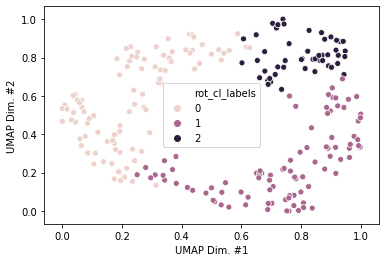

In [63]:
sns.scatterplot(x='UMAP Dim. #1', y='UMAP Dim. #2',
            hue='rot_cl_labels', data=rot_reduced)

In [64]:
# PCA

rot_PCAreducer = PCA(n_components=4)

rotPCA = rot_PCAreducer.fit_transform(rotsc_nona)
print(rotPCA)

[[ 9.75607248e-01  6.53493169e-01 -1.33689395e+00  6.80647170e-01]
 [-4.65911984e-01  2.17575797e+00  1.19875979e+00 -6.53298647e-02]
 [-1.91086560e+00  9.83005743e-01 -3.24584458e-01 -8.24817764e-01]
 [-5.78418944e-01  1.91051804e+00  1.91229544e+00  2.49558788e-01]
 [-1.17287643e+00  3.21850465e-01 -1.20835908e+00 -1.74076550e-01]
 [-1.60653211e+00  1.60304932e+00 -2.05415080e+00  4.04033340e-01]
 [-7.24853148e-01  3.40305767e-01 -3.01837683e+00  4.88674535e-01]
 [-1.88870851e+00 -2.33600443e-01 -1.74867902e-01  7.64679281e-02]
 [ 2.84915415e+00 -9.50514000e-01 -3.06249255e-01 -9.08210547e-01]
 [ 1.33259888e+00 -1.25754383e+00  1.98190740e-01  8.36359825e-01]
 [-9.88379340e-01  7.89729115e-01 -2.77079705e+00  4.05618554e-01]
 [-1.31855490e+00  6.88349145e-01 -1.16329766e+00 -3.03908514e-01]
 [-1.84311778e+00  6.15722877e-01 -1.38385804e+00 -1.10430219e-01]
 [ 1.53184836e-01  2.43699964e+00 -1.37466705e+00  1.15414416e+00]
 [ 4.41810194e-01 -2.49384591e+00 -8.30910939e-02 -9.79789181e

In [65]:
''' This loop gives us the top feature of each component using the argmax function '''
top_features = [np.abs(rot_PCAreducer.components_[i]).argmax() for i in range(rot_PCAreducer.components_.shape[0])]


''' Now, we go back to our original feature names (columns of our dataset), and get the names of the 4 key features '''
top_feature_names = [list(rotsc_nona.columns)[top_features[i]] for i in range(rot_PCAreducer.components_.shape[0])]

''' printing the names '''
for n,name in enumerate(top_feature_names):
    print("#" + str(n) + ": " + str(name))

#0: yaw_50.5
#1: yaw_71
#2: roll_72.5
#3: pitch_51.5


In [66]:
newrot = rotsc_nona[top_feature_names]
print(newrot)

     yaw_50.5    yaw_71  roll_72.5  pitch_51.5
0    0.854208  0.355169   0.650199    0.478169
1    0.563693  0.820713   0.454559    0.100464
2    0.171139  0.771243   0.446106    0.618393
3    0.678845  0.768792   0.265288    0.518642
4    0.266359  0.742557   0.685283    0.334642
..        ...       ...        ...         ...
227  0.824764  0.764875   0.387512    0.793582
228  0.286024  0.691433   0.478240    0.125695
229  0.407862  0.353685   0.712264    0.407729
230  0.243204  0.839330   0.415388    0.886123
231  0.062199  0.232459   0.036642    0.729497

[232 rows x 4 columns]


In [67]:
rotsc_nona

,yaw_5,yaw_6,yaw_8.5,yaw_9,yaw_9.5,yaw_11,yaw_11.5,yaw_12,yaw_13,yaw_14.5,...,roll_73.5,roll_74,roll_74.5,roll_75,roll_75.5,roll_76,roll_76.5,roll_77,roll_77.5,roll_79
0,0.366791,0.367280,0.233643,0.206486,0.206039,0.327263,0.311014,0.270549,0.327315,0.285819,...,0.629263,0.582712,0.710099,0.637345,0.703479,0.582113,0.599218,0.649079,0.623801,0.604241
1,0.356823,0.358809,0.294342,0.293812,0.296390,0.212569,0.211563,0.164954,0.195948,0.216494,...,0.534084,0.536563,0.534913,0.538490,0.541780,0.419807,0.356044,0.369408,0.327619,0.227406
2,0.496354,0.493780,0.376695,0.384188,0.376729,0.312896,0.282058,0.211525,0.240049,0.258468,...,0.530190,0.547277,0.544557,0.547727,0.564634,0.452303,0.497980,0.562095,0.474575,0.472808
3,0.680119,0.696518,0.637889,0.631789,0.630740,0.670843,0.679325,0.691220,0.661292,0.635608,...,0.302304,0.324892,0.322120,0.305598,0.284190,0.193155,0.188309,0.371387,0.300332,0.315650
4,0.363773,0.368019,0.325465,0.346680,0.343359,0.313455,0.308263,0.268896,0.336316,0.292351,...,0.705702,0.681827,0.684085,0.693106,0.713194,0.592236,0.684551,0.731525,0.663359,0.621078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0.396782,0.431830,0.204612,0.180883,0.177528,0.159581,0.157967,0.129635,0.166301,0.204837,...,0.455882,0.452264,0.453849,0.468019,0.484046,0.386441,0.416850,0.476395,0.391345,0.392736
228,0.532440,0.534905,0.455583,0.450145,0.453540,0.447371,0.443229,0.410270,0.441937,0.401214,...,0.403012,0.504870,0.522504,0.527613,0.521576,0.414281,0.442481,0.523427,0.437808,0.416370
229,1.000000,1.000000,1.000000,1.000000,0.998687,0.700195,0.601348,0.440068,0.300657,0.272377,...,0.724542,0.698945,0.701503,0.702541,0.702932,0.559553,0.619106,0.657932,0.590441,0.534421
230,0.554548,0.517393,0.403044,0.410178,0.426412,0.423137,0.416172,0.327245,0.317422,0.094524,...,0.535014,0.611458,0.611227,0.581526,0.583183,0.476030,0.535571,0.588782,0.479644,0.454202
